In [29]:
from ostir import run_ostir
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
from src.utils.sequences import dna_to_rna
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/output/with_factors.csv")

In [5]:
df.head(1)

,Unnamed: 0,sequence_dna,fitness,p_value,standard_error,mutated_wildtype_dna,rna_loops,mutated_amino_acids,minimum_free_energy,non_wildtype_rbs_rate,rbs_results,rbs_expression_99,rbs_expression_100,rbs_expression_101,rbs_expression_38,rbs_expression_70,rbs_expression_103,rbs_expression_105,rbs_expression_106,rbs_expression_107,rbs_expression_104,rbs_expression_102,rbs_expression_82,rbs_expression_87,rbs_expression_25
0,0,GCCGATCTC,0.0,NaN,NaN,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))...((((....,ADL,-37.400002,20.4062,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0,17.239,0.5859,0.0,0.0,0.0,0.0,0.0,0.0,2.5786,0.0027,670.2197


In [7]:
df["normalized_fitness"] = df.apply(lambda row: row["fitness"] - df[df["mutated_amino_acids"] == row["mutated_amino_acids"]]["fitness"].mean(), axis=1)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fitness', ylabel='rbs_expression_105'>

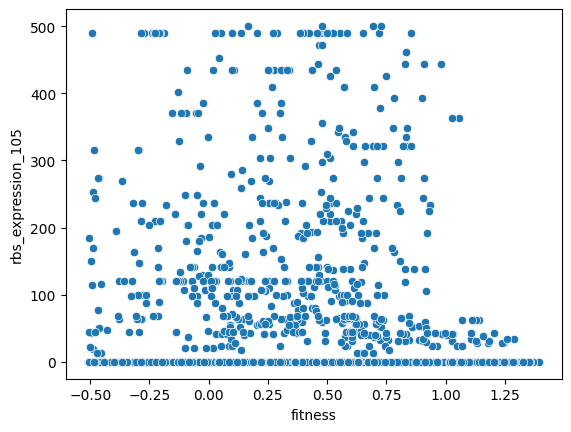

In [8]:
sns.scatterplot(data=df, x="fitness", y="rbs_expression_105")

### Investigate RBS

In [13]:
extended = df.explode("rbs_results")    
extended = extended.join(pd.DataFrame(extended["rbs_results"].values.tolist()))

In [14]:
extended.sort_values(by=["normalized_fitness", "start_position"], ascending=False).head(10)

KeyError: 'start_position'

In [ ]:
relevant = extended[extended.expression > 50]

In [ ]:
relevant.groupby("start_position").fitness.describe()

,count,mean,std,min,25%,50%,75%,max
start_position,,,,,,,,
25,18647.0,0.264173,0.535713,-0.507834,-0.252718,0.255437,0.719197,1.351106
101,663.0,0.196847,0.504984,-0.505984,-0.281909,0.153532,0.640989,1.163286
102,1216.0,0.158236,0.512045,-0.500513,-0.330165,0.068506,0.569457,1.356194
103,11.0,1.092553,0.053005,1.046418,1.046418,1.046418,1.147915,1.147915
104,1140.0,0.196106,0.516719,-0.507725,-0.279235,0.126783,0.667069,1.203144
105,401.0,0.277997,0.528819,-0.486782,-0.230075,0.265368,0.691157,1.264654
106,35.0,0.133373,0.430432,-0.474161,-0.417524,0.317289,0.365801,0.769026
107,1909.0,0.257859,0.558276,-0.507603,-0.293430,0.243107,0.752205,1.356266


In [10]:
relevant.groupby("start_position").normalized_fitness.describe()

NameError: name 'relevant' is not defined

In [ ]:
extended[extended.start_position == 107].normalized_fitness.hist()

NameError: name 'extended' is not defined

In [ ]:
df.mutated_wildtype_dna[0]

'AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGTTAGCGGTAGATCGCGTTATCGGCATGGAAAACGCCATGCCGTGGAACCTGCCTGCCGATCTCGCCTGGTTT'

In [ ]:
run_ostir("AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGTTAGCGGTAGATCGCGTTATCGGCATGGAAAACGCCATGCCGTGGAACCTGCCTGCCGATCTCGCCTGGTTT")

[{'name': 'unnamed',
  'start_codon': 'ATG',
  'start_position': 25,
  'expression': 670.2197,
  'RBS_distance_bp': 4,
  'dG_total': 1.9289,
  'dG_rRNA:mRNA': -6.781,
  'dG_mRNA': -9.9,
  'dG_spacing': 0.0039,
  'dG_standby': 0.0,
  'dG_start_codon': -1.194},
 {'name': 'unnamed',
  'start_codon': 'TTG',
  'start_position': 38,
  'expression': 17.239,
  'RBS_distance_bp': 4,
  'dG_total': 11.0794,
  'dG_rRNA:mRNA': -1.281,
  'dG_mRNA': -11.2,
  'dG_spacing': 0.0039,
  'dG_standby': -1.2,
  'dG_start_codon': -0.0435},
 {'name': 'unnamed',
  'start_codon': 'ATG',
  'start_position': 70,
  'expression': 0.5859,
  'RBS_distance_bp': 7,
  'dG_total': 19.5332,
  'dG_rRNA:mRNA': -6.581,
  'dG_mRNA': -25.1,
  'dG_spacing': 0.8082,
  'dG_standby': -1.4,
  'dG_start_codon': -1.194},
 {'name': 'unnamed',
  'start_codon': 'ATG',
  'start_position': 82,
  'expression': 2.5786,
  'RBS_distance_bp': 4,
  'dG_total': 15.8289,
  'dG_rRNA:mRNA': -6.581,
  'dG_mRNA': -23.6,
  'dG_spacing': 0.0039,
  'dG_s

In [253]:
run_ostir(dna_to_rna("AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGTTAGCGGTAGATCGCGTTATCGGCATGGAAAACGCCATGCCGTGGAACCTGCCTGCCGATCTCGCCTGGTTT"))

[{'name': 'unnamed',
  'start_codon': 'AUG',
  'start_position': 25,
  'expression': 670.2197,
  'RBS_distance_bp': 4,
  'dG_total': 1.9289,
  'dG_rRNA:mRNA': -6.781,
  'dG_mRNA': -9.9,
  'dG_spacing': 0.0039,
  'dG_standby': 0.0,
  'dG_start_codon': -1.194},
 {'name': 'unnamed',
  'start_codon': 'UUG',
  'start_position': 38,
  'expression': 17.239,
  'RBS_distance_bp': 4,
  'dG_total': 11.0794,
  'dG_rRNA:mRNA': -1.281,
  'dG_mRNA': -11.2,
  'dG_spacing': 0.0039,
  'dG_standby': -1.2,
  'dG_start_codon': -0.0435},
 {'name': 'unnamed',
  'start_codon': 'AUG',
  'start_position': 70,
  'expression': 0.5859,
  'RBS_distance_bp': 7,
  'dG_total': 19.5332,
  'dG_rRNA:mRNA': -6.581,
  'dG_mRNA': -25.1,
  'dG_spacing': 0.8082,
  'dG_standby': -1.4,
  'dG_start_codon': -1.194},
 {'name': 'unnamed',
  'start_codon': 'AUG',
  'start_position': 82,
  'expression': 2.5786,
  'RBS_distance_bp': 4,
  'dG_total': 15.8289,
  'dG_rRNA:mRNA': -6.581,
  'dG_mRNA': -23.6,
  'dG_spacing': 0.0039,
  'dG_s

,Unnamed: 0,sequence_dna,fitness,p_value,standard_error,mutated_wildtype_dna,rna_loops,mutated_amino_acids,minimum_free_energy,non_wildtype_rbs_rate,normalized_fitness,rbs_results
0,0,GCCGATCTC,0.000000,NaN,NaN,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))...((((....,ADL,-37.400002,20.4062,0.130546,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
1,327,AAAACCACG,-0.489613,1.012618e-39,0.037122,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))(((.((.....,KTT,-32.000000,22.8856,0.000000,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
2,944,AAAATGGTT,-0.484830,1.909968e-210,0.015660,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((.((((.....(((((...)))))...((.....,KMV,-31.299999,278.6662,0.000000,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
3,1047,AAACAACCG,-0.466593,4.988938e-71,0.026184,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))(((.((.....,KQP,-32.000000,22.8856,0.000000,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
4,1208,AAACAGTCT,0.044777,1.201437e-05,0.010229,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))(((.(((.(((.((((....,KQS,-33.400002,24.2878,0.000000,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
...,...,...,...,...,...,...,...,...,...,...,...,...
18034,261044,TTTTGTCTT,-0.131108,3.021629e-22,0.013517,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((......(((.(((((...)))))...((.....,FCL,-29.000000,245.5247,0.006542,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
18035,261073,TTTTGTTTA,-0.118258,3.821135e-43,0.008588,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,.............(((....)))...((((((.((((..((((.((...,FCL,-29.799999,110.4166,0.019392,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
18036,261075,TTTTGTTTG,-0.195192,4.213145e-52,0.012851,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))(((.((.....,FCL,-32.700001,83.5126,-0.057542,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."
18037,261079,TTTTTAAAG,-0.285090,1.051108e-80,0.014985,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))(((.((.....,FLK,-35.000000,20.2992,0.000000,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st..."


In [16]:
correlation = pd.read_csv("../data/output/correlation.csv")
correlation["aa"] = correlation["Unnamed: 0"].map(lambda x: x.replace("(", "").replace(")", "").replace("'", "").replace(",", ""))
correlation["num_sequences"] = correlation["aa"].map(lambda x: len(df[df["mutated_amino_acids"] == x]))

In [90]:
correlation_105 = correlation[correlation.rbs_expression_105_correlation_p_value < 0.05]
len(correlation_105)

16

In [86]:
correlation_105

,Unnamed: 0,non_wildtype_rbs_rate_correlation,minimum_free_energy_correlation,rbs_expression_25_correlation,rbs_expression_38_correlation,rbs_expression_70_correlation,rbs_expression_82_correlation,rbs_expression_87_correlation,rbs_expression_99_correlation,rbs_expression_100_correlation,rbs_expression_101_correlation,rbs_expression_102_correlation,rbs_expression_103_correlation,rbs_expression_104_correlation,rbs_expression_105_correlation,rbs_expression_106_correlation,rbs_expression_107_correlation,non_wildtype_rbs_rate_correlation_p_value,minimum_free_energy_correlation_p_value,rbs_expression_25_correlation_p_value,rbs_expression_38_correlation_p_value,rbs_expression_70_correlation_p_value,rbs_expression_82_correlation_p_value,rbs_expression_87_correlation_p_value,rbs_expression_99_correlation_p_value,rbs_expression_100_correlation_p_value,rbs_expression_101_correlation_p_value,rbs_expression_102_correlation_p_value,rbs_expression_103_correlation_p_value,rbs_expression_104_correlation_p_value,rbs_expression_105_correlation_p_value,rbs_expression_106_correlation_p_value,rbs_expression_107_correlation_p_value,non_wildtype_rbs_rate_correlation_significant,minimum_free_energy_correlation_significant,rbs_expression_25_correlation_significant,rbs_expression_38_correlation_significant,rbs_expression_70_correlation_significant,rbs_expression_82_correlation_significant,rbs_expression_87_correlation_significant,rbs_expression_99_correlation_significant,rbs_expression_100_correlation_significant,rbs_expression_101_correlation_significant,rbs_expression_102_correlation_significant,rbs_expression_103_correlation_significant,rbs_expression_104_correlation_significant,rbs_expression_105_correlation_significant,rbs_expression_106_correlation_significant,rbs_expression_107_correlation_significant,aa,num_sequences
247,"('DDC',)",0.595238,0.191620,NaN,NaN,0.000000,0.357143,-0.024098,NaN,NaN,-0.102869,NaN,NaN,NaN,0.740674,NaN,-0.446958,0.119530,0.649410,NaN,NaN,1.000000,0.385121,0.954833,NaN,NaN,0.808477,NaN,NaN,NaN,0.035559,NaN,0.266876,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,DDC,8
315,"('EDC',)",0.380952,0.975900,NaN,NaN,NaN,0.119763,-0.377964,NaN,NaN,NaN,NaN,NaN,NaN,0.710285,NaN,-0.558081,0.351813,0.000034,NaN,NaN,NaN,0.777583,0.355918,NaN,NaN,NaN,NaN,NaN,NaN,0.048349,NaN,0.150568,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,EDC,8
377,"('FDC',)",0.761905,0.904762,NaN,NaN,0.218218,0.547619,-0.286902,NaN,NaN,0.102869,NaN,NaN,NaN,0.811754,NaN,-0.253673,0.028005,0.002008,NaN,NaN,0.603645,0.160026,0.490849,NaN,NaN,0.808477,NaN,NaN,NaN,0.014411,NaN,0.544374,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,FDC,8
398,"('FEC',)",0.666667,0.540131,NaN,NaN,0.000000,-0.125988,-0.437193,NaN,NaN,-0.038311,NaN,NaN,NaN,0.780720,NaN,-0.434188,0.070988,0.166988,NaN,NaN,1.000000,0.766260,0.278729,NaN,NaN,0.928238,NaN,NaN,NaN,0.022215,NaN,0.282427,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,FEC,8
569,"('HDC',)",0.571429,0.975900,NaN,NaN,NaN,0.233239,0.170783,NaN,NaN,-0.355142,NaN,NaN,NaN,0.791755,NaN,-0.462910,0.138960,0.000034,NaN,NaN,NaN,0.578279,0.685955,NaN,NaN,0.387980,NaN,NaN,NaN,0.019198,NaN,0.248066,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,HDC,8
640,"('IDC',)",0.524476,0.385967,NaN,NaN,-0.051209,0.352343,-0.791715,NaN,NaN,0.237735,NaN,NaN,NaN,0.750876,NaN,-0.411377,0.080019,0.215271,NaN,NaN,0.874417,0.261322,0.002150,NaN,NaN,0.456853,NaN,NaN,NaN,0.004886,NaN,0.183980,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,IDC,12
708,"('KDC',)",0.514979,0.975900,NaN,NaN,NaN,0.290957,-0.577350,NaN,NaN,NaN,NaN,NaN,NaN,0.811754,NaN,-0.507346,0.191549,0.000034,NaN,NaN,NaN,0.484462,0.133975,NaN,NaN,NaN,NaN,NaN,NaN,0.014411,NaN,0.199359,False,True,False,False,False,False,Fal

In [87]:
samples_105

,Unnamed: 0,sequence_dna,fitness,p_value,standard_error,mutated_wildtype_dna,rna_loops,mutated_amino_acids,minimum_free_energy,non_wildtype_rbs_rate,rbs_results,rbs_expression_99,rbs_expression_100,rbs_expression_101,rbs_expression_38,rbs_expression_70,rbs_expression_103,rbs_expression_105,rbs_expression_106,rbs_expression_107,rbs_expression_104,rbs_expression_102,rbs_expression_82,rbs_expression_87,rbs_expression_25,normalized_fitness
123,2170,AAAGACTGC,0.481379,0.000000e+00,0.006408,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))((((((....((((.((...,KDC,-36.000000,27.1086,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0000,17.239,1.9455,0.0,0.0000,0.0,0.0000,0.0,0.0,7.9037,0.0204,670.2197,-0.135000
125,2172,AAAGACTGT,0.270434,0.000000e+00,0.006271,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((.............((((((....((((.((...,KDC,-36.200001,180.1061,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0000,17.239,1.9455,0.0,0.0000,0.0,147.0623,0.0,0.0,13.8372,0.0221,670.2197,-0.345945
246,2298,AAAGATTGC,0.922844,0.000000e+00,0.005618,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))((((((....((((.((...,KDC,-33.700001,225.7892,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0000,17.239,1.9455,0.0,191.5945,0.0,0.0000,0.0,0.0,14.9898,0.0204,670.2197,0.306465
248,2300,AAAGATTGT,0.832993,0.000000e+00,0.006058,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((.............((((((....((((.((...,KDC,-33.900002,510.9213,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0000,17.239,1.9455,0.0,335.4311,0.0,141.2955,0.0,0.0,14.9898,0.0204,670.2197,0.216614
421,6263,AACGACTGC,0.525860,0.000000e+00,0.009554,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..........(((((...)))))(((((((...,NDC,-36.299999,26.7551,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0000,17.239,1.5928,0.0,0.0000,0.0,0.0000,0.0,0.0,7.9037,0.0196,670.2197,-0.128508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,259409,TTTGACTGT,0.042873,1.418988e-10,0.006684,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((.............(((((.((..((((.((...,FDC,-35.299999,123.5372,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,37.8193,17.239,1.9455,0.0,0.0000,0.0,58.6037,0.0,0.0,7.9037,0.0260,670.2197,-0.281425
17938,259471,TTTGAGTGC,-0.321389,4.991492e-91,0.015884,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((....(((((....(((..(((((((.((.....,FEC,-35.000000,291.3586,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,23.4013,17.239,1.9455,0.0,236.9655,0.0,0.0000,0.0,0.0,11.7912,0.0161,670.2197,-0.016405
17940,259473,TTTGAGTGT,-0.359134,1.694472e-154,0.013563,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((....(((((....(((..(((((((.((.....,FEC,-35.000000,244.6534,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,37.8193,17.239,1.9455,0.0,120.0456,0.0,51.9765,0.0,0.0,15.6015,0.0260,670.2197,-0.054150
18000,259535,TTTGATTGC,0.571582,0.000000e+00,0.005933,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))(((((.((..((((.((...,FDC,-32.799999,474.2402,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,33.5425,17.239,1.9455,0.0,409.7016,0.0,0.0000,0.0,0.0,11.7912,0.0204,670.2197,0.247284


In [98]:
samples_105 = df[df.mutated_amino_acids.isin(correlation_105.aa)]
len(samples_105)

200

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='normalized_fitness', ylabel='rbs_expression_105'>

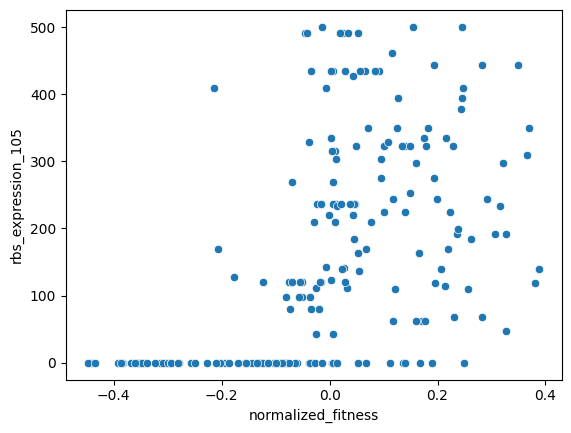

In [19]:
sns.scatterplot(data=samples_105, x="normalized_fitness", y="rbs_expression_105")

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcor

<Axes: xlabel='normalized_fitness', ylabel='rbs_expression_105'>

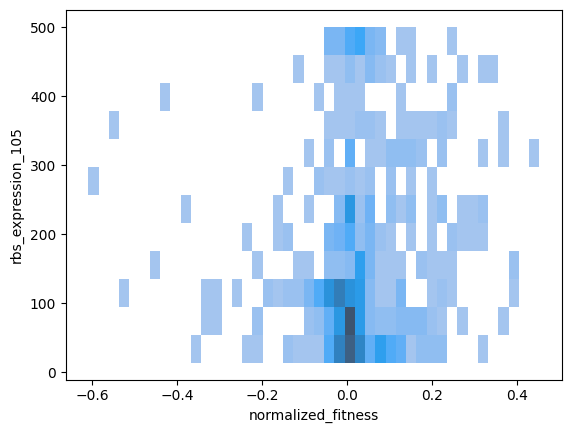

In [20]:
sns.histplot(data=df[df["rbs_expression_105"] > 10], x="normalized_fitness", y="rbs_expression_105")

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_82325/3714362408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.rbs_expression_105 > 50].normalized_fitness, label="rbs_expression_105 > 50")
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

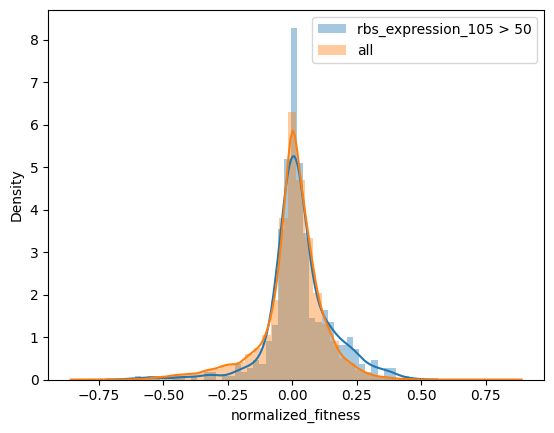

In [38]:
sns.distplot(df[df.rbs_expression_105 > 50].normalized_fitness, label="rbs_expression_105 > 50")
sns.distplot(df.normalized_fitness, label="all")
plt.legend()

<Axes: >

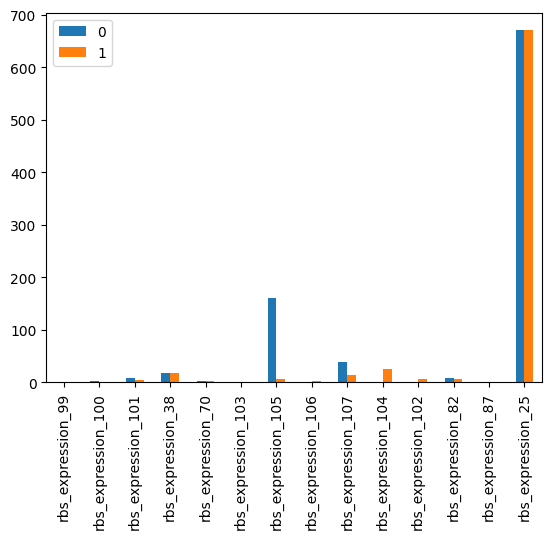

In [66]:
rbs_cols = [col for col in df.columns if "rbs_expression" in col]
(
    pd.concat([samples_105[rbs_cols].mean(), df[rbs_cols].mean()], axis=1)
    .plot.bar()
)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='normalized_fitness', ylabel='rbs_expression_105'>

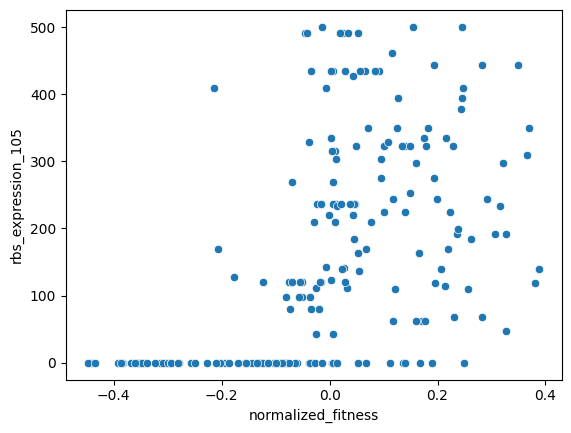

In [44]:
sns.scatterplot(data=samples_105, x="normalized_fitness", y="rbs_expression_105")

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


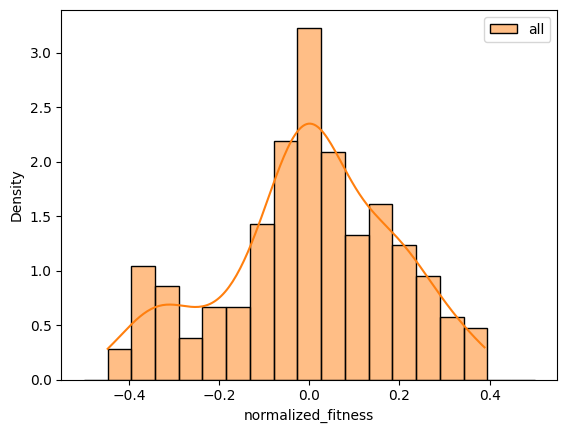

In [85]:
bins = np.linspace(-0.5, 0.5, 20)
sns.histplot(samples_105[samples_105.rbs_expression_104 > 50].normalized_fitness, label="rbs_expression_105 > 50", stat="density", bins=bins, kde=True)
sns.histplot(samples_105.normalized_fitness, label="all", stat="density", bins=bins, kde=True)
plt.legend()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcor

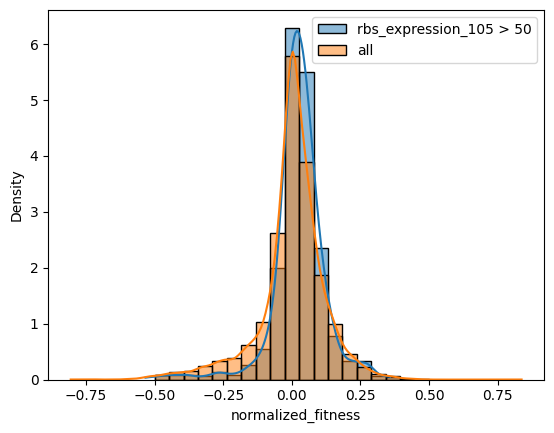

In [84]:
bins = np.linspace(-0.5, 0.5, 20)
sns.histplot(df[df.rbs_expression_104 > 50].normalized_fitness, label="rbs_expression_105 > 50", stat="density", bins=bins, kde=True)
sns.histplot(df.normalized_fitness, label="all", stat="density", bins=bins, kde=True)
plt.legend()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcor

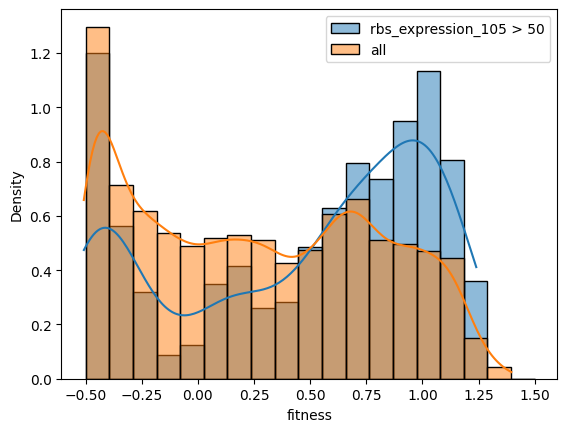

In [83]:
bins = np.linspace(-0.5, 1.5, 20)
sns.histplot(df[df.rbs_expression_104 > 50].fitness, label="rbs_expression_105 > 50", stat="density", bins=bins, kde=True)
sns.histplot(df.fitness, label="all", stat="density", bins=bins, kde=True)
plt.legend()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rbs_expression_105', ylabel='Count'>

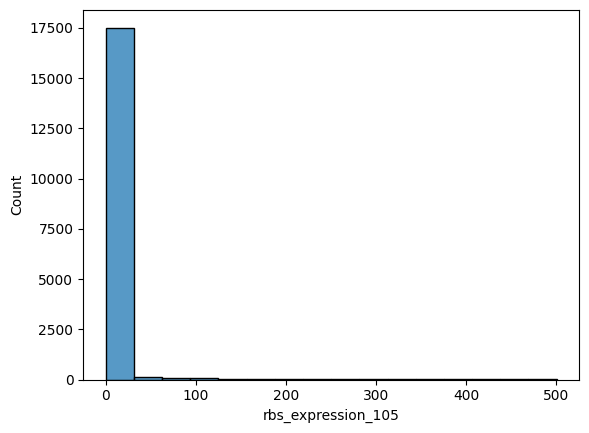

In [76]:
sns.histplot(df, x="rbs_expression_105")

In [82]:
len(df[df.rbs_expression_104 > 50]), len(df[df.rbs_expression_104 > 50]) / len(df)

(998, 0.055324574532956375)

In [106]:
samples_105_h_50 = df[df.rbs_expression_105 > 50]

In [109]:
"CTGGAACTA" in samples_105.sequence_dna

False

In [108]:
samples_105.mutated_amino_acids.unique()

array(['KDC', 'NDC', 'REC', 'IDC', 'QDC', 'HDC', 'PDC', 'LEC', 'LDC',
       'LDW', 'EDC', 'DDC', 'VDC', 'YDC', 'FEC', 'FDC'], dtype=object)